# Imports

In [10]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Task 1

In [4]:
data = pd.read_csv("./Advertising.csv").iloc[:,1:]
data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
X = data.iloc[:, :-1].assign(ones=[1 for _ in range(len(data))]).to_numpy()
y = data.iloc[:, -1].to_numpy()

In [6]:
def hypothesis(X, thetas):
    return np.dot(X, thetas)

def losser(y, y_hat):
    return np.sqrt(np.mean(np.square(y - y_hat)))                                       ####    IMPORTANT!!!!! RMSE Loss Tasken

def compute_derivs(X, y, thetas):
    derivs = []
    for i in range(X.shape[1]-1, -1, -1):
        deriv = -2 * np.sum((y - hypothesis(X, thetas)) * (X[:,i])) / X.shape[0]
        derivs.append(deriv)
    return np.array(derivs)

def update_weights(thetas, alpha, derivs):
    return thetas - (alpha * derivs)

In [7]:
def train(X, y, alpha, epochs):
    X = preprocessing.MinMaxScaler().fit_transform(X)
    thetas = np.random.random(X.shape[1])
    y_hat = hypothesis(X, thetas)
    weights = [thetas]
    losses = [losser(y, y_hat)]
    for epoch in range(epochs):
        derivs = compute_derivs(X, y, thetas)
        thetas = update_weights(thetas, alpha, derivs)
        y_hat = hypothesis(X, thetas)
        loss = losser(y, y_hat)

        weights.append(thetas)
        losses.append(loss)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch + 1:3d}: Loss={loss:2.3f}")

    return np.array(weights), np.array(losses)

In [14]:
epochs = 100
alpha = 0.1
history = train(X, y, alpha, epochs)

Epoch   5: Loss=11.362
Epoch  10: Loss=9.299
Epoch  15: Loss=8.063
Epoch  20: Loss=7.371
Epoch  25: Loss=7.011
Epoch  30: Loss=6.840
Epoch  35: Loss=6.772
Epoch  40: Loss=6.760
Epoch  45: Loss=6.779
Epoch  50: Loss=6.814
Epoch  55: Loss=6.860
Epoch  60: Loss=6.913
Epoch  65: Loss=6.971
Epoch  70: Loss=7.035
Epoch  75: Loss=7.104
Epoch  80: Loss=7.177
Epoch  85: Loss=7.255
Epoch  90: Loss=7.338
Epoch  95: Loss=7.427
Epoch 100: Loss=7.521


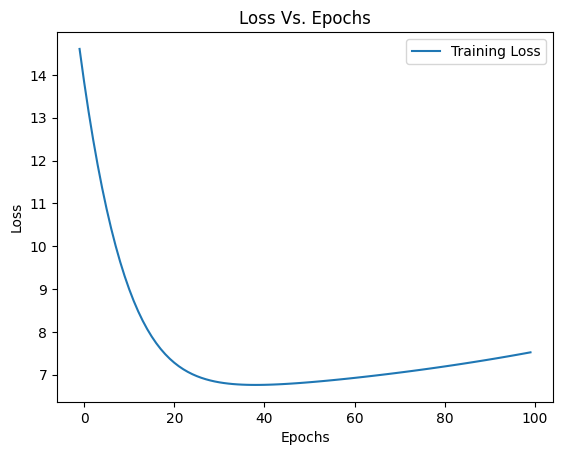

In [21]:
thetas = history[0]
losses = history[1]
plt.plot([i for i in range(-1, epochs)], losses, label='Training Loss')

plt.title('Loss Vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Display the plot
plt.legend(loc='best')
plt.show()

In [23]:
best_loss = losses[losses.argmin()]
best_thetas = thetas[losses.argmin()]

print(f"Best Loss: {best_loss}, Best Thetas: {best_thetas}")

Best Loss: 6.7597361230772295, Best Thetas: [ 0.25320359  9.77664708 23.40551547 33.45581245]


# Task 2

In [43]:
X = np.array([[1,1],
            [2,1],
            [3,1],
            [4,1],
            [5,1]])
y = np.array([3,5,7,9,11])

In [72]:
epochs = 100
alpha = 0.05
history = train(X, y, alpha, epochs)

Epoch   5: Loss=7.506
Epoch  10: Loss=7.506
Epoch  15: Loss=7.506
Epoch  20: Loss=7.506
Epoch  25: Loss=7.506
Epoch  30: Loss=7.506
Epoch  35: Loss=7.506
Epoch  40: Loss=7.506
Epoch  45: Loss=7.506
Epoch  50: Loss=7.506
Epoch  55: Loss=7.506
Epoch  60: Loss=7.506
Epoch  65: Loss=7.506
Epoch  70: Loss=7.506
Epoch  75: Loss=7.506
Epoch  80: Loss=7.506
Epoch  85: Loss=7.506
Epoch  90: Loss=7.506
Epoch  95: Loss=7.506
Epoch 100: Loss=7.506


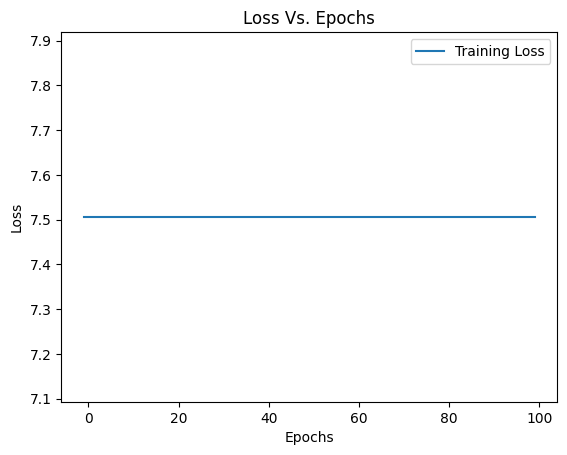

In [73]:
thetas = history[0]
losses = history[1]
plt.plot([i for i in range(-1, epochs)], losses, label='Training Loss')

plt.title('Loss Vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Display the plot
plt.legend(loc='best')
plt.show()

In [74]:
best_loss = losses[losses.argmin()]
best_thetas = thetas[losses.argmin()]

print(f"Best Loss: {best_loss}, Best Thetas: {best_thetas}")

Best Loss: 7.506219230664416, Best Thetas: [0.07318683 0.90203246]


# Task 3

##### We can use Linear Regression for classification but it's not suitable because of these reasons
1. Predicted value from the Linear Regreesion is continuous, not probabilistic, so witout thresholding we can't specify classes
2. Linear Regression is very sensitive to imbalance data

# Task 4

##### Squared Error is just the sum of the square of the losses but Mean Squared Error is the squared estimate of how much a single predicted value is different from the actual value

# Task 5

***Root Mean Squared Error (RMSE)*** is a ***better estimate*** than ***Mean Squared Error (MSE)*** beacuse ***RMSE*** gives the ***average*** estimate of how much a single predicted value is different from the actual value whereas ***MSE*** gives the ***average squared*** estimate of how much a single predicted value is different from the actual value. This is important because the ***squared loss*** can get very large large if your parameters are off so ***to normalize the loss*** we use RMSE.   